# Stage 3: Modelling and Prediction 

>Data is ready for the training of models

> We will use scikit-learn modules to perform our modelling.
 
> The goal is to generate models that will best predict the price per night based on which features the model deems to be of high importance/influence.


In [76]:
# Import requirements 
from catboost import CatBoostRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import confusion_matrix,accuracy_score, explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,  cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz
from xgboost import plot_importance, plot_tree

import matplotlib.pyplot as plt # we only need pyplot
import numpy as np
import pandas as pd
import seaborn as sb
import xgboost as xgb

sb.set() # set the default Seaborn style for graphics

In [3]:
# Load dataframe
listingsDF = pd.read_csv('tabular_data/tabular_data/clean_tabular_data.csv')

# First, we model based on numerical data.

> We will create a features array that contains all the columns that are numerical.

> Then we extract the price per night as the label array for predictions/tests.

In [5]:
dataset = listingsDF
features = dataset[["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"]]
labels = dataset[["Price_Night"]]
loaded_data = features,labels
newListingsDF= dataset[["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"]]
newListingsDF.info()  # confirm that the Dtypes are float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   guests                829 non-null    float64
 1   beds                  829 non-null    float64
 2   bathrooms             829 non-null    float64
 3   Cleanliness_rating    829 non-null    float64
 4   Accuracy_rating       829 non-null    float64
 5   Communication_rating  829 non-null    float64
 6   Location_rating       829 non-null    float64
 7   Check-in_rating       829 non-null    float64
 8   Value_rating          829 non-null    float64
 9   amenities_count       829 non-null    float64
dtypes: float64(10)
memory usage: 64.9 KB


In [6]:
# Features array snippet
features.head()

guests  beds  bathrooms  Cleanliness_rating  Accuracy_rating  \
0     2.0   1.0        1.0                 4.6              4.7   
1     3.0   3.0        1.0                 4.3              4.7   
2     4.0   2.0        1.5                 4.2              4.6   
3     2.0   1.0        1.0                 4.8              4.9   
4     4.0   3.0        1.0                 5.0              4.9   

   Communication_rating  Location_rating  Check-in_rating  Value_rating  \
0                   4.3              5.0              4.3           4.3   
1                   4.6              4.9              4.7           4.5   
2                   4.8              4.8              4.8           4.7   
3                   4.9              4.9              5.0           4.6   
4                   5.0              4.7              5.0           4.7   

   amenities_count  
0             13.0  
1              8.0  
2             51.0  
3             23.0  
4             32.0

In [7]:
#Labels array snippet
labels.head()

Price_Night
0        105.0
1         92.0
2         52.0
3        132.0
4        143.0

# Regression Models

> In Machine Learning, there are supervised, unsupervised, and reinforcement learning.

> For the next models, we use the supervised learning.

> In supervised learning, there are two types : 1. Regression, 2. Classification
> 1. Linear, Ridge, Lasso, Stochastic Gradient Descent (SGD).
> 2. Random Forest, XGBoost, CatBoost and K-nearest neighbours

In [14]:
# Differentiation of features and labels
X = features
y = labels
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = list(X.columns))

In [15]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Supervised Machine Learning Models

> Model 1 - Linear Regression

    A simple model based on an equation of Regression Problem : Price = a * (Predictor Variables) + b

In [47]:
# Creating and fitting the model
linreg= LinearRegression()
linreg.fit(X_train, y_train)
print('Intercept of Regression \t: b  = ', linreg.intercept_)

# Print the Coefficients of the Linear Regression line
linreg_coefs= pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0][:])), columns = ['Predictors','Coefficients'])
print(linreg_coefs)

# Coefficients where the value is positive means that as the predictor variable increases, the response variable will also increase.. and vice versa

Intercept of Regression 	: b  =  [154.01131111]
             Predictors  Coefficients
0                guests     46.588898
1                  beds     -5.831391
2             bathrooms     37.289468
3    Cleanliness_rating     16.132040
4       Accuracy_rating     24.307995
5  Communication_rating      7.670939
6       Location_rating     19.365987
7       Check-in_rating    -15.239984
8          Value_rating    -34.667392
9       amenities_count      5.865998


In [48]:
# Predict Response corresponding to Predictors

trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

In [49]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

 Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

> Model 2: Ridge Regression

 >Theoretically an upgraded version of the linear regression in that its'   purpose is to handle overfitting of data. 
 >Simply, it does this by penalising RSS by adding another term and search for the minimization.

In [50]:
# Numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count"])

In [52]:
# Initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

In [53]:
# Store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})
ridgeDF

lambdas = np.arange(0,4000,1) 
for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
ridgeDF

bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])

#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()



C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

The highest R2 value:  0.3920082692703175
The value of lambda that minimises:  0


C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2437232687.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

variable          1     guests      beds  bathrooms  Cleanliness_rating  \
0          estimate  46.588898 -5.831391  37.289468           16.132040   
1         estimate0  46.588898 -5.831391  37.289468           16.132040   
2         estimate1  46.277742 -5.528081  37.220411           16.081432   
3         estimate2  45.973930 -5.231991  37.151806           16.031171   
4         estimate3  45.677197 -4.942868  37.083647           15.981248   

variable  Accuracy_rating  Communication_rating  Location_rating  \
0               24.307995              7.670939        19.365987   
1               24.307995              7.670939        19.365987   
2               24.188926              7.615175        19.332011   
3               24.070996              7.560028        19.298112   
4               23.954190              7.505493        19.264292   

variable  Check-in_rating  Value_rating  amenities_count  
0              -15.239984    -34.667392         5.865998  
1              -15.239984    -34.667392         5.865998  
2              -15.143505    -34.552906         5.892692  
3              -15.047988    -34.438962         5.918795  
4              -14.953421    -34.325567         5.944327

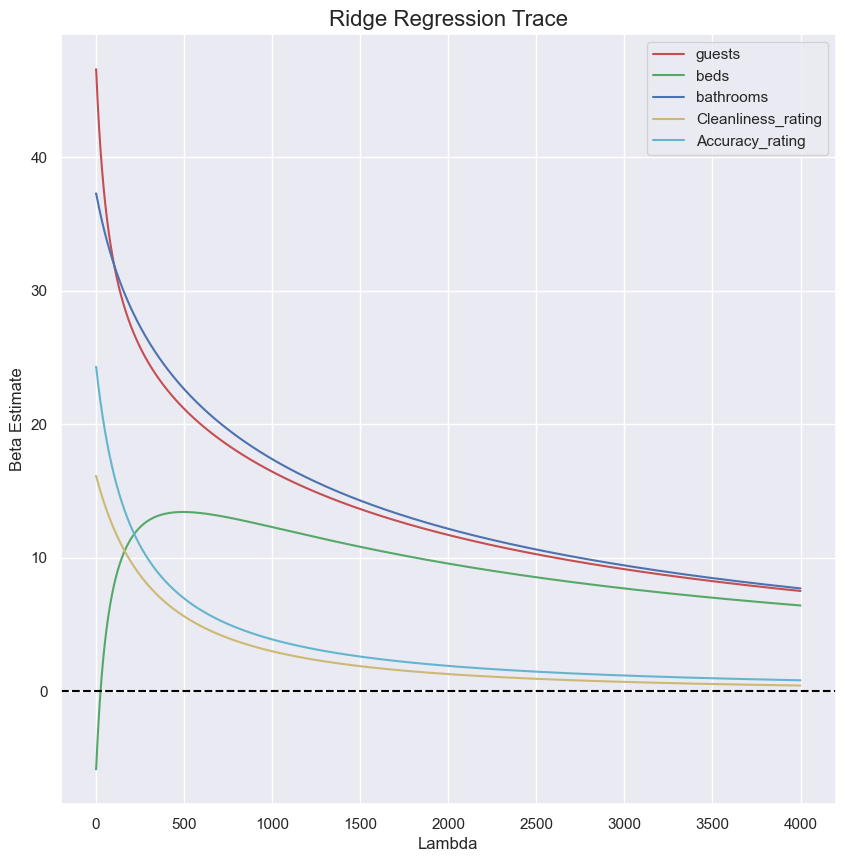

In [54]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.guests,'r',ridgeDF.beds,'g',ridgeDF.bathrooms,'b',ridgeDF.Cleanliness_rating,'y',ridgeDF.Accuracy_rating,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['guests','beds','bathrooms','Cleanliness_rating','Accuracy_rating'])

ax.grid(True)

> Model 3: Lasso Regression

In [55]:
# Initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
# Stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02) #lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


# Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

The highest R2 value:  0.39200805954992635


C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()


variable                             1     guests      beds  bathrooms  \
0                             estimate  41.453338 -0.000000  35.568802   
1                         estimate0.01  46.519099 -5.749376  37.268299   
2                         estimate0.03  46.379227 -5.585194  37.226026   
3         estimate0.049999999999999996  46.240013 -5.421382  37.183596   
4          estimate0.06999999999999999  46.100571 -5.257443  37.141219   

variable  Cleanliness_rating  Accuracy_rating  Communication_rating  \
0                  14.535231        21.878492              4.302710   
1                  16.116102        24.284595              7.637332   
2                  16.084220        24.237777              7.570127   
3                  16.052366        24.190991              7.502882   
4                  16.020500        24.144188              7.435651   

variable  Location_rating  Check-in_rating  Value_rating  amenities_count  
0               18.193001       -10.732028    -31.611620         5.421453  
1               19.354265       -15.195536    -34.637860         5.862087  
2               19.330822       -15.106639    -34.578819         5.854294  
3               19.307375       -15.017737    -34.519715         5.846437  
4               19.283930       -14.928834    -34.460630         5.838602

C:\Users\dongc\AppData\Local\Temp\ipykernel_11952\3564523565.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-1, 100, 1))


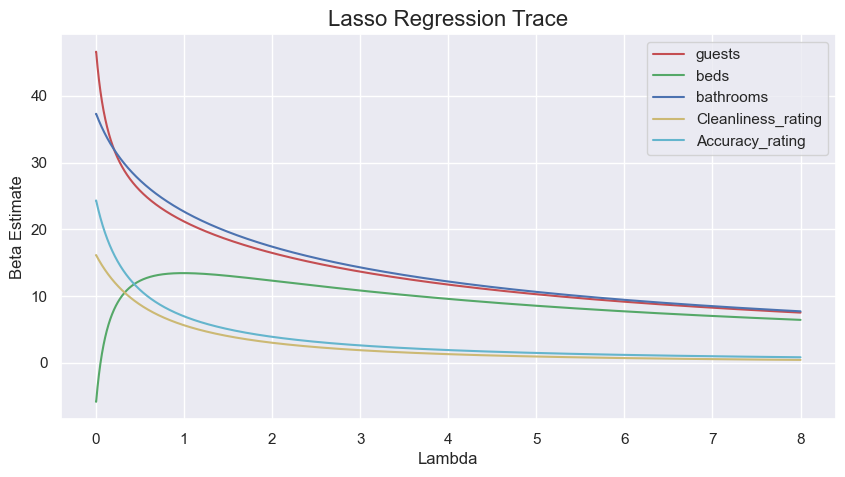

In [56]:
# Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ridgeDF.guests,'r',ridgeDF.beds,'g',ridgeDF.bathrooms,'b',ridgeDF.Cleanliness_rating,'y',ridgeDF.Accuracy_rating,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['guests','beds','bathrooms','Cleanliness_rating','Accuracy_rating'])
ax.grid(True)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

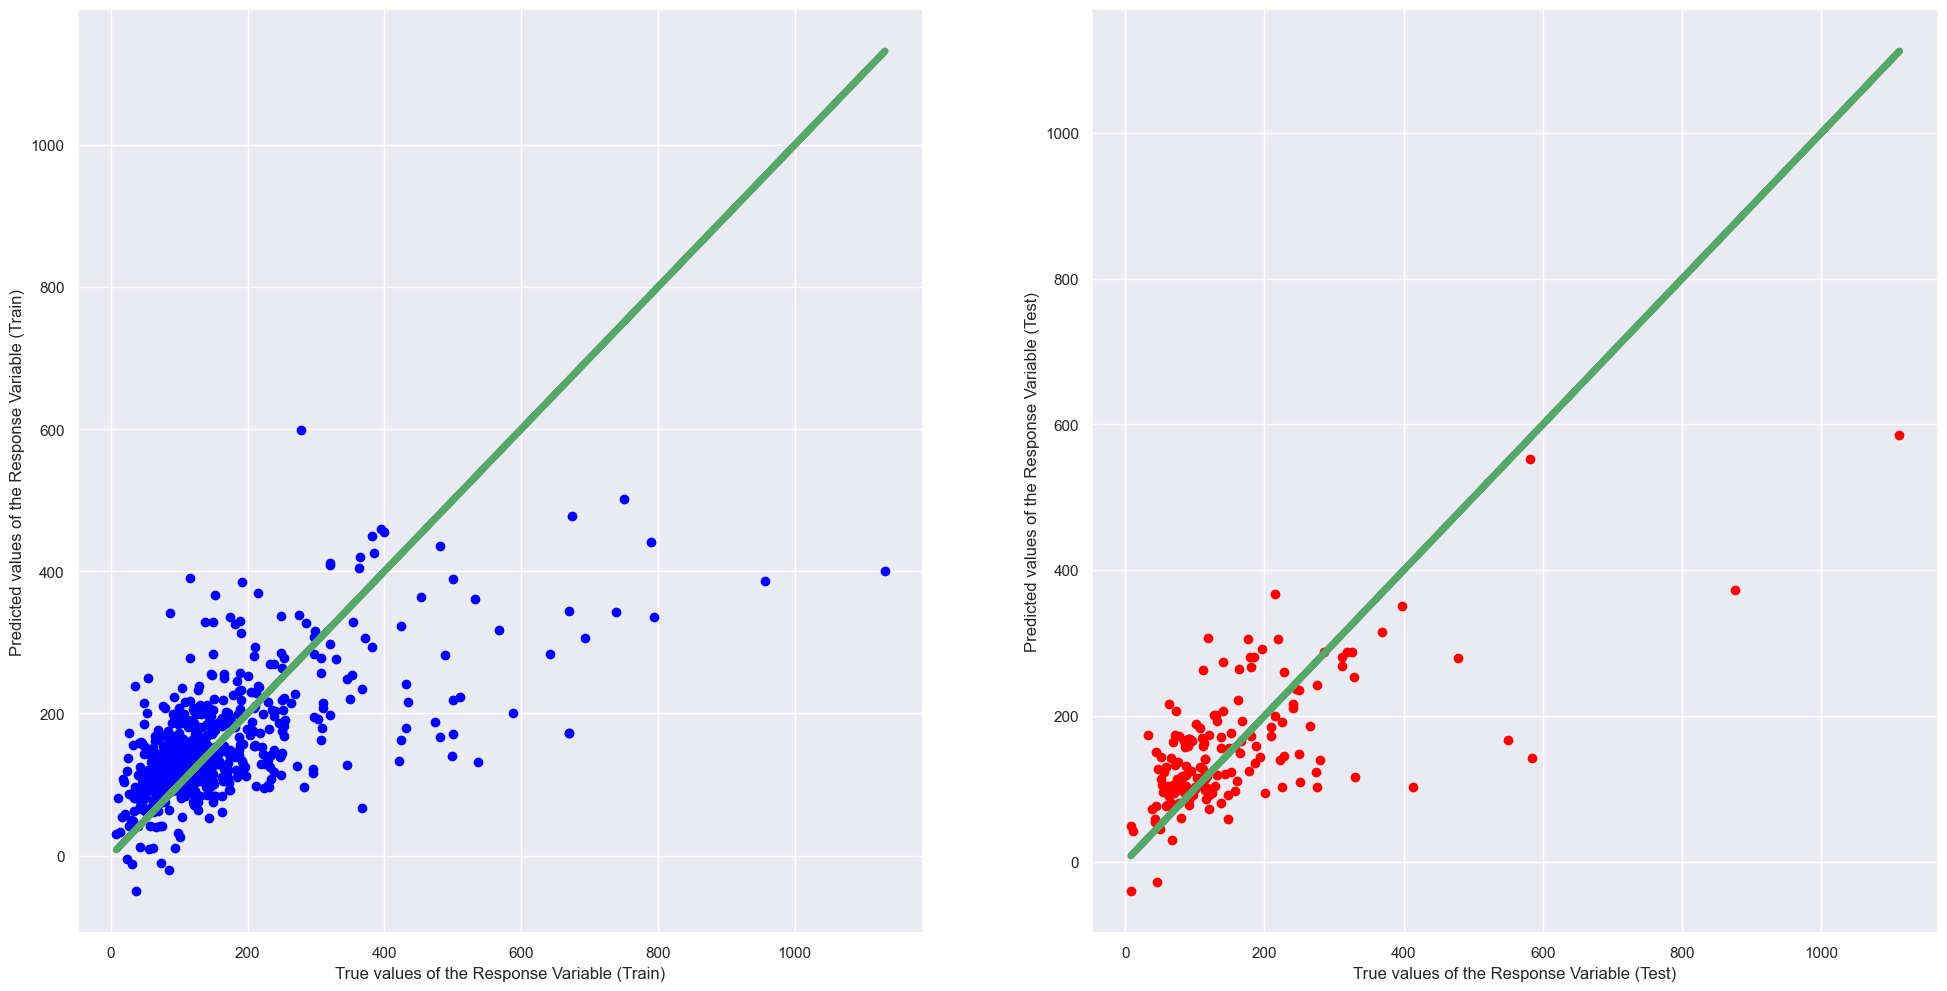

In [57]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


> Model 4: Stochastic Gradient Descent

In [ ]:
# Creating and fitting the model
stochastic_gradient_descent = SGDRegressor()
stochastic_gradient_descent.fit(X_train, y_train)

# Coefficients of the SGDRegressor

print('Intercept of Regression \t: b = ', stochastic_gradient_descent.intercept_)
print()

# Print the coefficients against predictors

print(pd.DataFrame(list(zip(X_train.columns, stochastic_gradient_descent.coef_)), columns = ["Predictors", "Coefficients"]))
print()
stochastic_gradient_descent_coefs = pd.DataFrame(list(zip(X_train.columns, stochastic_gradient_descent.coef_)), columns = ["Predictors", "Coefficients"])



Intercept of Regression 	: b =  [155.55184737]

             Predictors  Coefficients
0                guests     44.535503
1                  beds    -10.945737
2             bathrooms     44.486629
3    Cleanliness_rating     19.276086
4       Accuracy_rating     27.341050
5  Communication_rating      0.703628
6       Location_rating     22.553183
7       Check-in_rating    -13.250957
8          Value_rating    -39.303712
9       amenities_count      7.717599




 The best parameters across ALL searched params:
 {'alpha': 0.1, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.1}


C:\Users\dongc\AppData\Local\Temp\ipykernel_3152\2662946234.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99)` for the same effect.

  sb.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)


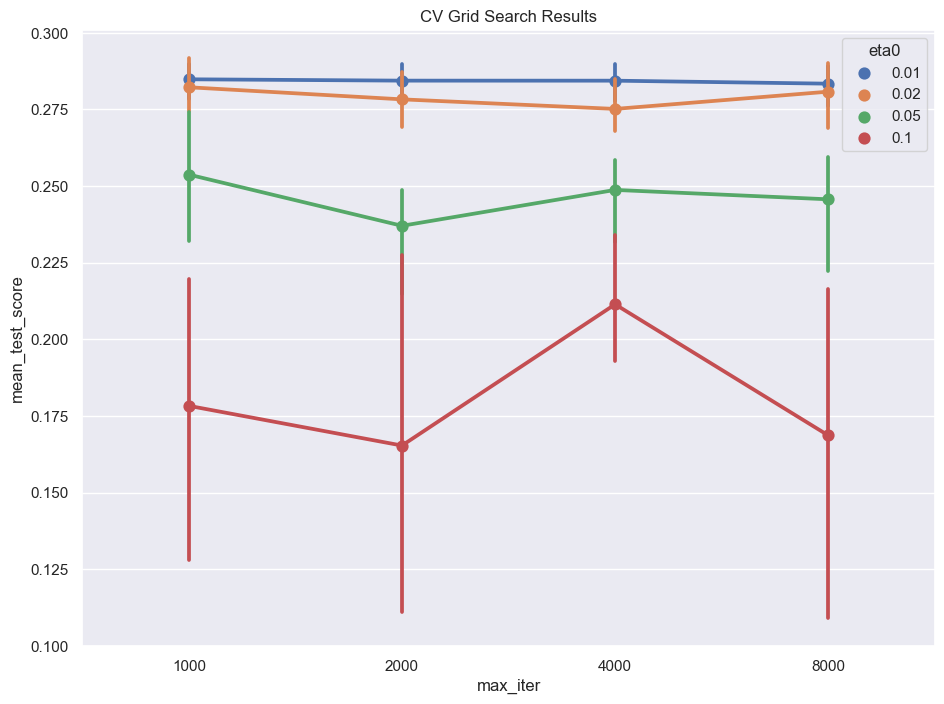

In [ ]:
# Grid search Cross Validation on sgdregressor
stochastic_gradient_descent = SGDRegressor()
params = {'alpha':[0.001,0.01,0.1,1], 'eta0':[0.01,0.02,0.05,0.1],'max_iter': [1000,2000,4000,8000],'tol':[0.001,0.01,0.1,1]}
parameters  = GridSearchCV(estimator = stochastic_gradient_descent, param_grid= params, refit= True,cv = 10)
y_train = np.ravel(y_train)
parameters.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",
          parameters.best_params_)

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sb.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig
fig = plot_cv_results(parameters.cv_results_, 'max_iter', 'eta0')


# Classification Models

> Model 1:  Random Forest Regression

In [58]:
# Tuning of Parameters

random_grid = {'n_estimators': [2000],
               'max_features': [2,5],
               'max_depth': [40,70],
               'min_samples_split': [40,50],
               'max_leaf_nodes':[50,70],
               'max_features': [2,5]}
               
rf_tune = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)
y_train = np.ravel(y_train)
rf_random.fit(X_train,y_train)

print(rf_random.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
RandomForestRegressor(max_depth=70, max_features=2, max_leaf_nodes=50,
                      min_samples_split=40, n_estimators=2000)


In [59]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)


In [60]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

Weight
Communication_rating  0.011350
Accuracy_rating       0.011933
Cleanliness_rating    0.015375
Check-in_rating       0.016104
Location_rating       0.040571
Value_rating          0.043324
amenities_count       0.088284
beds                  0.131919
bathrooms             0.274559
guests                0.366581

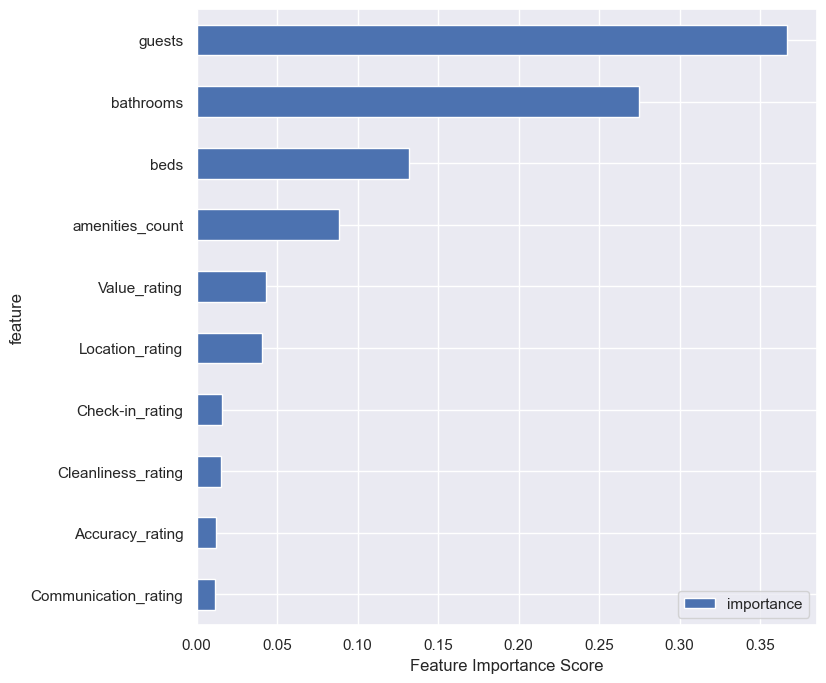

In [61]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

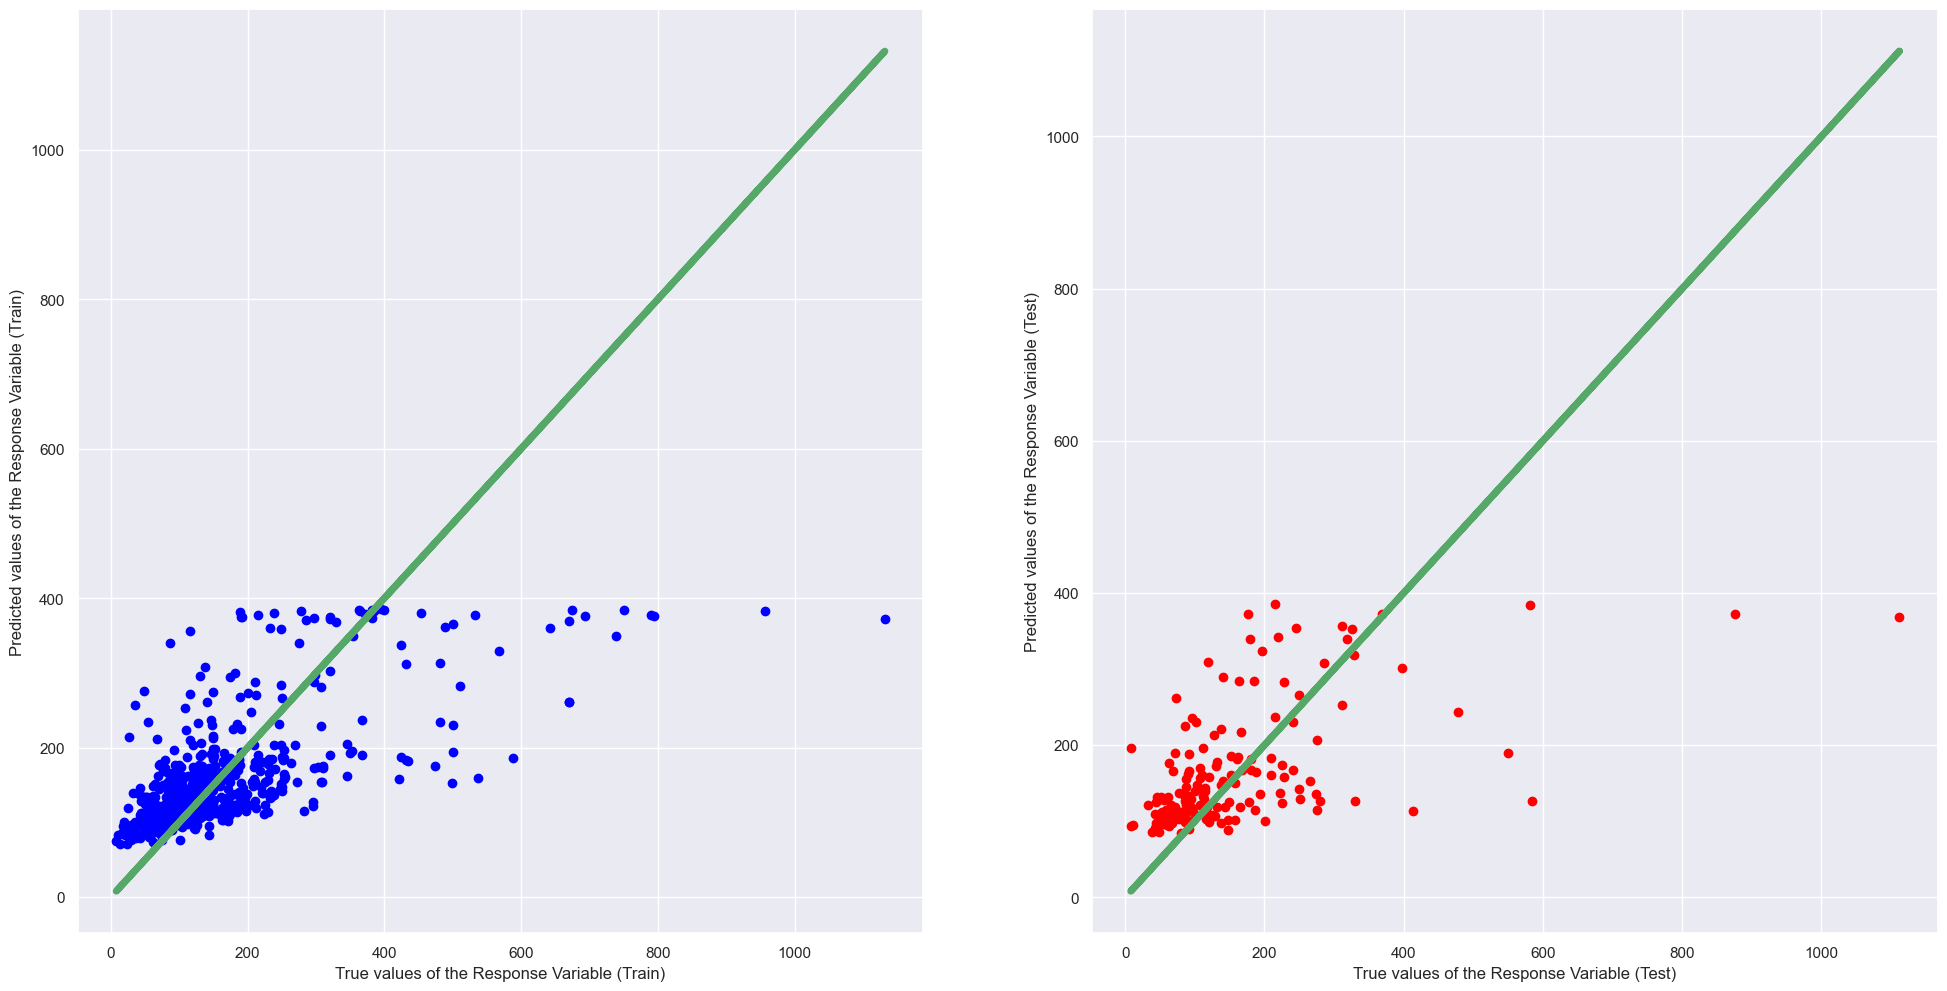

In [62]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


> Model 2 : XGBoost

In [63]:
#Tuning the Parameters

parameters_for_testing = {
    'colsample_bytree':[0.3,0.5],
    'learning_rate':[0.1,0.5],
    'alpha': [10,12],
    'max_depth':[3,5],
    'n_estimators':[2000],  
}

                    
xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,gamma=0, colsample_bytree=0.8)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)

print(gsearch1.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(alpha=12, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=12, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [64]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

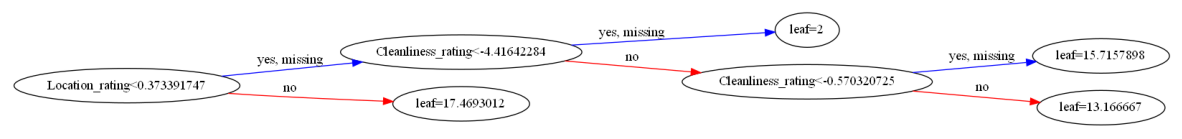

In [65]:
# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [66]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
Accuracy_rating       0.053846
Communication_rating  0.060978
Cleanliness_rating    0.063980
amenities_count       0.066729
Check-in_rating       0.066970
Location_rating       0.067655
Value_rating          0.073051
beds                  0.145563
bathrooms             0.150182
guests                0.251045

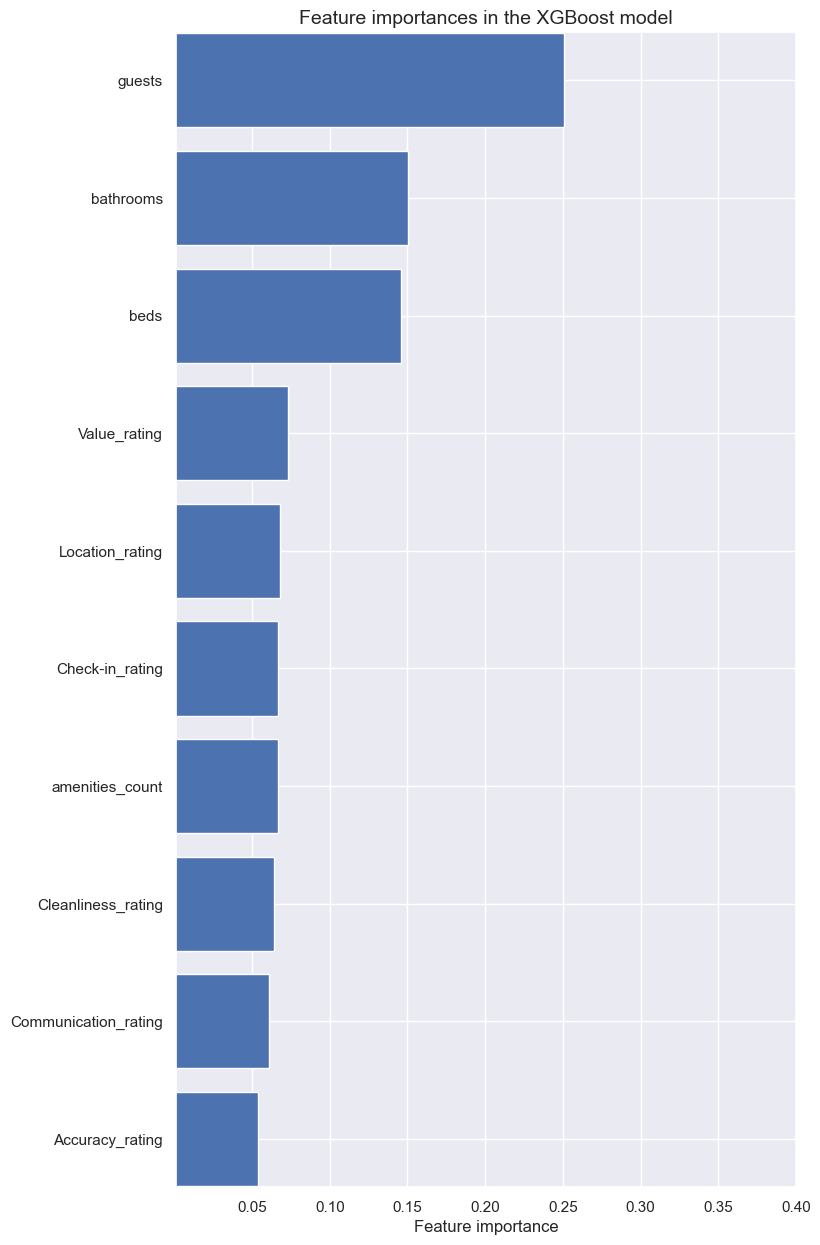

In [67]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

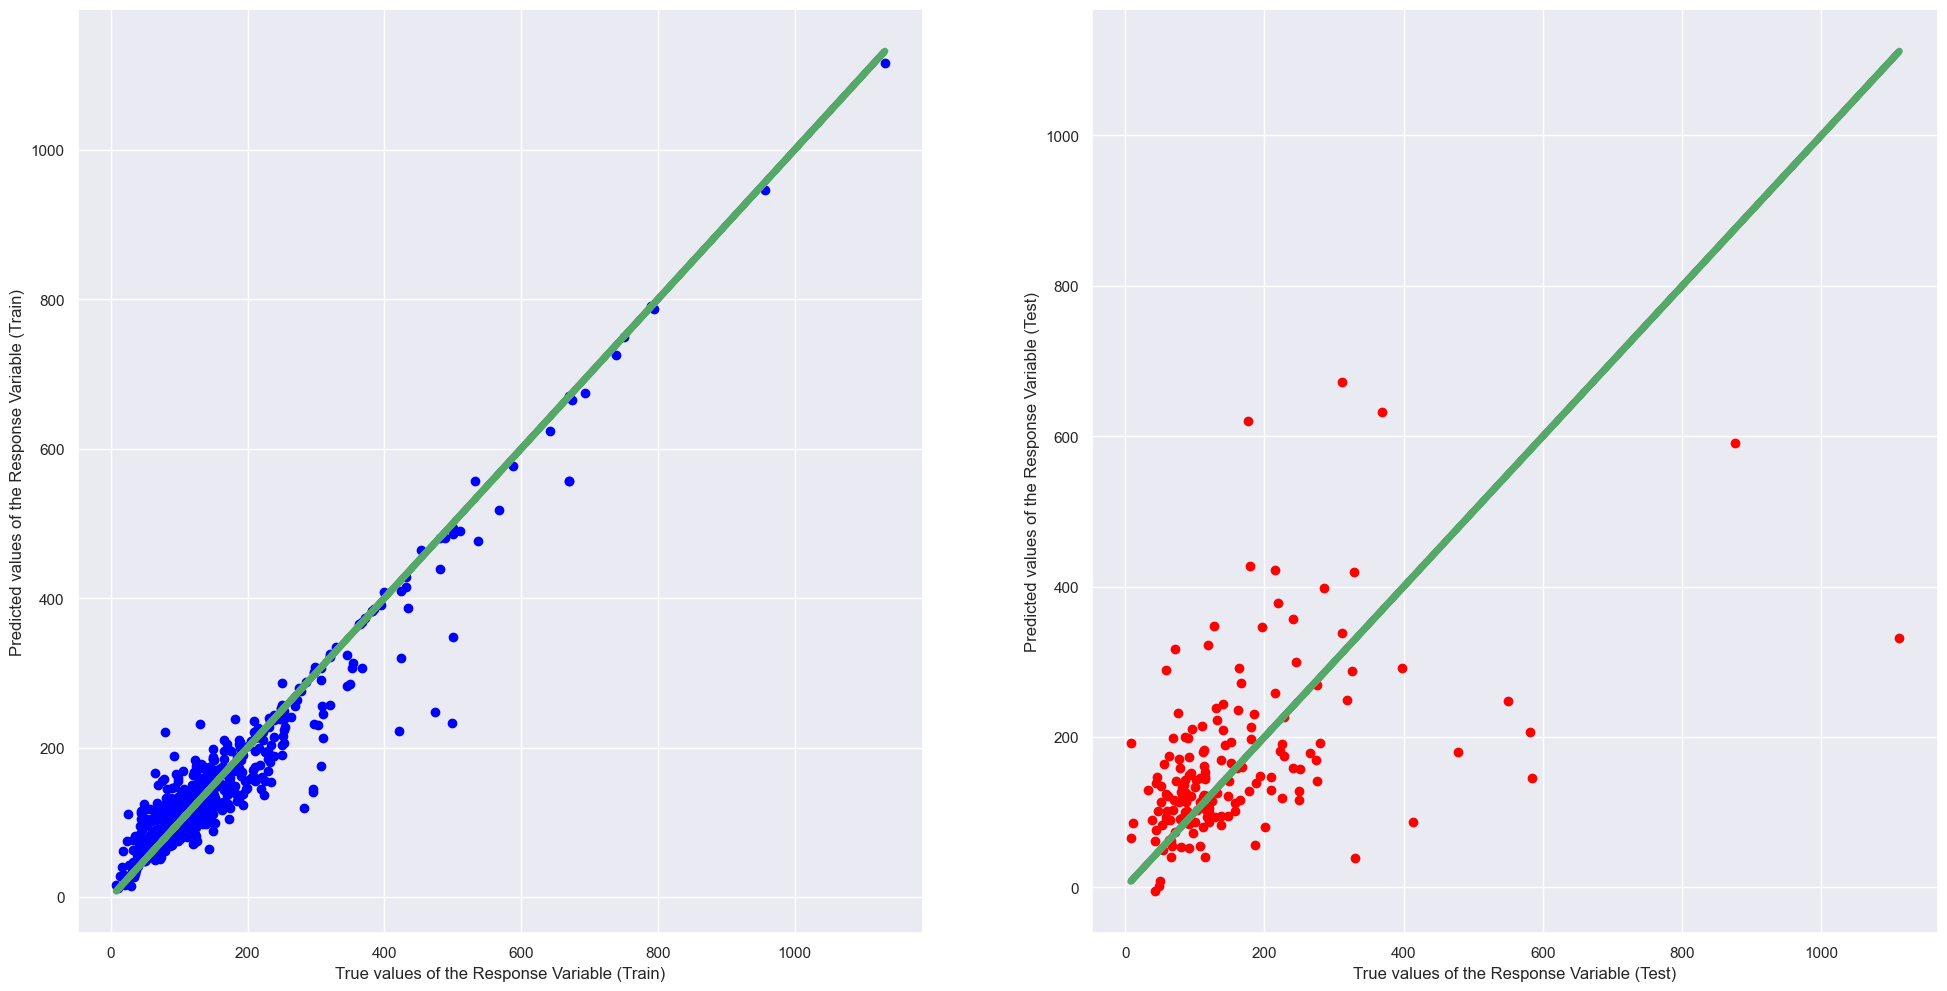

In [68]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

> Model 3: CatBoost

    CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems.

In [69]:
catBoost = CatBoostRegressor()

parameters = {'depth'         : [3,5],
                'learning_rate' : [0.1,0.5],
                'iterations'    : [2000]
                }
grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
y_train = np.ravel(y_train)
grid.fit(X_train, y_train)

print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py", line 5590, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "c:\Users\dongc\miniconda3\envs\datascience\lib\site-pac

0:	learn: 112.5314930	total: 146ms	remaining: 4m 52s
1:	learn: 104.2869957	total: 148ms	remaining: 2m 27s
2:	learn: 99.6182277	total: 148ms	remaining: 1m 38s
3:	learn: 95.2347068	total: 149ms	remaining: 1m 14s
4:	learn: 91.1578166	total: 149ms	remaining: 59.6s
5:	learn: 89.7187076	total: 150ms	remaining: 49.8s
6:	learn: 87.8684292	total: 150ms	remaining: 42.8s
7:	learn: 86.1280601	total: 151ms	remaining: 37.5s
8:	learn: 84.9084464	total: 151ms	remaining: 33.4s
9:	learn: 83.1451391	total: 152ms	remaining: 30.2s
10:	learn: 82.1298822	total: 152ms	remaining: 27.5s
11:	learn: 81.6417111	total: 152ms	remaining: 25.3s
12:	learn: 80.4387505	total: 153ms	remaining: 23.4s
13:	learn: 79.1764556	total: 153ms	remaining: 21.7s
14:	learn: 77.1581581	total: 154ms	remaining: 20.3s
15:	learn: 75.9821004	total: 154ms	remaining: 19.2s
16:	learn: 74.4068146	total: 155ms	remaining: 18.1s
17:	learn: 73.6824097	total: 156ms	remaining: 17.1s
18:	learn: 72.2063118	total: 156ms	remaining: 16.3s
19:	learn: 70.25

In [70]:
catBoost.get_params()

{'loss_function': 'RMSE'}

In [71]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 123.5415461	total: 968us	remaining: 1.94s
1:	learn: 120.8658159	total: 2.06ms	remaining: 2.06s
2:	learn: 118.2896171	total: 2.46ms	remaining: 1.64s
3:	learn: 115.6214889	total: 2.8ms	remaining: 1.4s
4:	learn: 113.7595895	total: 3.87ms	remaining: 1.54s
5:	learn: 111.9911875	total: 4.21ms	remaining: 1.4s
6:	learn: 110.1242681	total: 4.61ms	remaining: 1.31s
7:	learn: 108.8158250	total: 4.92ms	remaining: 1.23s
8:	learn: 107.5350586	total: 5.27ms	remaining: 1.17s
9:	learn: 106.7357523	total: 5.61ms	remaining: 1.12s
10:	learn: 105.6480114	total: 5.91ms	remaining: 1.07s
11:	learn: 104.4059188	total: 6.24ms	remaining: 1.03s
12:	learn: 103.5825935	total: 6.63ms	remaining: 1.01s
13:	learn: 102.8880582	total: 6.97ms	remaining: 989ms
14:	learn: 101.8231568	total: 7.4ms	remaining: 979ms
15:	learn: 101.2941320	total: 7.8ms	remaining: 967ms
16:	learn: 100.7208546	total: 8.16ms	remaining: 952ms
17:	learn: 100.1645469	total: 8.49ms	remaining: 935ms
18:	learn: 99.7655582	total: 8.89ms	remainin

(0.001, 20.0)

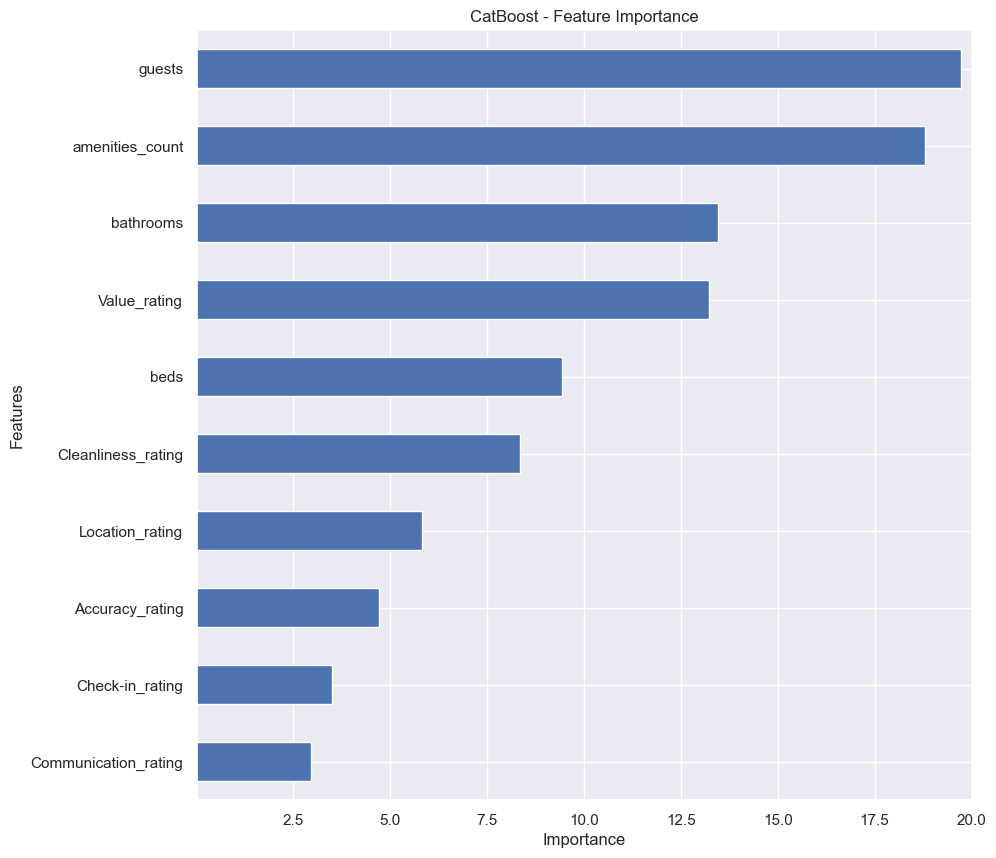

In [72]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.xlim(0.001, 20.0)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

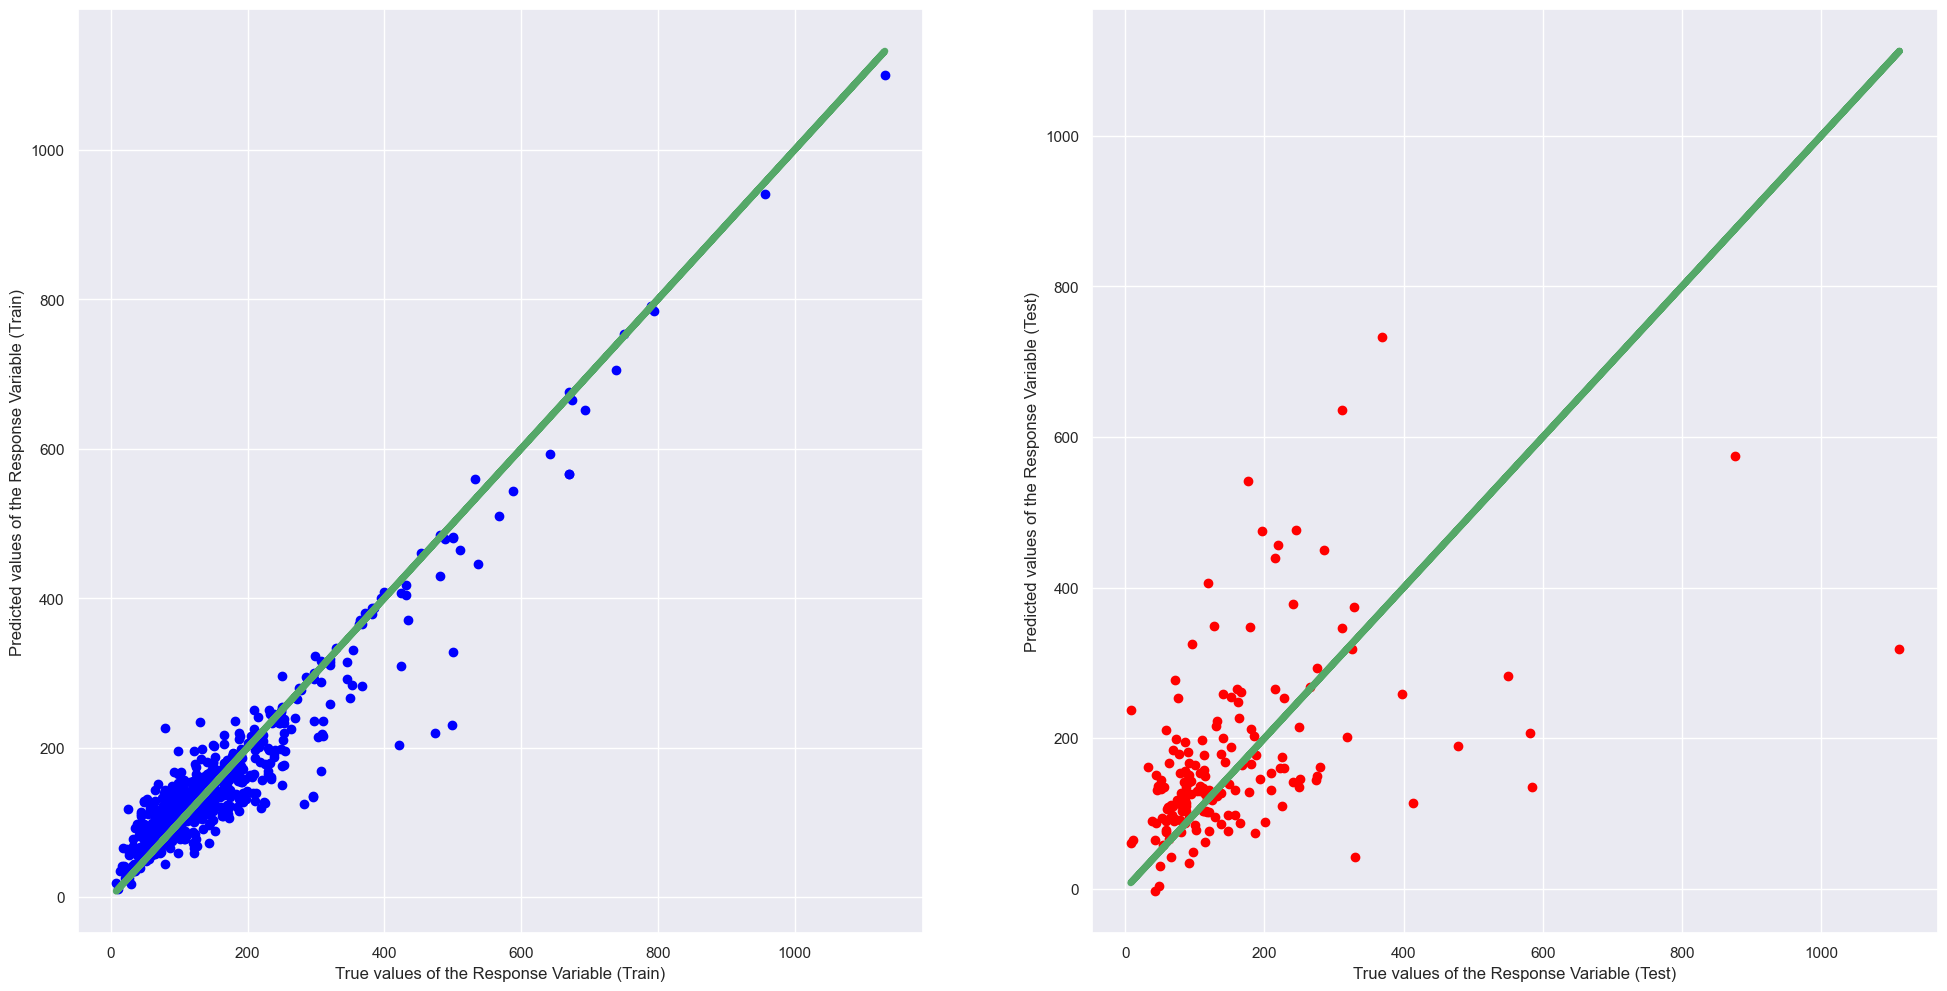

In [73]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")


# Evaluation of model performance
 This is done using Train/Test Set Split in which the data set is split into 80% : 20%.

In [74]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))

print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 10350.3007
Linear Regression (R^2): 0.4604

Ridge Regression (MSE): 10350.3007
Ridge Regression (R^2): 0.4604

Lasso Regression (MSE): 10351.8588
Lasso Regression (R^2): 0.4603

Random Forest Regression (MSE): 13052.1448
Random Forest Regression (R^2): 0.3196

XGBoost (MSE): 16683.9878
XGBoost (R^2): 0.1302

CatBoost (MSE): 17718.2881
CatBoost (R^2): 0.0763


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.392
Ridge Regression (R^2): 0.392
Lasso Regression (R^2): 0.392
Random Forest Regression (R^2): 0.4553
XGBoost (R^2): 0.9159
CatBoost (R^2): 0.8957


However, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics.

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model

# K-fold Cross Validation

In [77]:
kf = KFold(n_splits = 10)
y_oned = np.ravel(y)
scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_RF = cross_validate(RF,X,y_oned,cv=kf,scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg,X,y_oned,cv=kf,scoring=scoring)
results_kfold_CatB = cross_validate(CatB,X,y_oned,cv=kf,scoring=scoring)

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\xgboost\data.py:250: FutureWarning: pan

0:	learn: 126.8122771	total: 4.51ms	remaining: 9.03s
1:	learn: 123.4540978	total: 5.61ms	remaining: 5.6s
2:	learn: 120.4987411	total: 6.26ms	remaining: 4.17s
3:	learn: 117.2417253	total: 6.93ms	remaining: 3.46s
4:	learn: 114.6057044	total: 7.7ms	remaining: 3.07s
5:	learn: 112.7202606	total: 8.39ms	remaining: 2.79s
6:	learn: 110.5982583	total: 8.98ms	remaining: 2.56s
7:	learn: 109.1032451	total: 9.63ms	remaining: 2.4s
8:	learn: 107.7259037	total: 10.3ms	remaining: 2.27s
9:	learn: 106.4542888	total: 10.9ms	remaining: 2.17s
10:	learn: 105.3642704	total: 11.6ms	remaining: 2.09s
11:	learn: 104.2303583	total: 12.2ms	remaining: 2.02s
12:	learn: 103.0093711	total: 12.9ms	remaining: 1.96s
13:	learn: 102.1559243	total: 13.5ms	remaining: 1.91s
14:	learn: 101.2843102	total: 14.1ms	remaining: 1.86s
15:	learn: 100.6411182	total: 14.6ms	remaining: 1.81s
16:	learn: 99.9686739	total: 15.2ms	remaining: 1.78s
17:	learn: 99.1858578	total: 15.8ms	remaining: 1.74s
18:	learn: 98.4411441	total: 16.4ms	remaini

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 125.7213842	total: 761us	remaining: 1.52s
1:	learn: 123.1367176	total: 1.71ms	remaining: 1.71s
2:	learn: 120.2410460	total: 2.35ms	remaining: 1.56s
3:	learn: 117.3361748	total: 3.16ms	remaining: 1.57s
4:	learn: 114.8529440	total: 4.05ms	remaining: 1.61s
5:	learn: 113.0404310	total: 4.78ms	remaining: 1.59s
6:	learn: 111.0931817	total: 5.32ms	remaining: 1.51s
7:	learn: 109.6912485	total: 6.02ms	remaining: 1.5s
8:	learn: 108.3753737	total: 6.59ms	remaining: 1.46s
9:	learn: 107.2955549	total: 7.17ms	remaining: 1.43s
10:	learn: 106.2246814	total: 7.76ms	remaining: 1.4s
11:	learn: 105.1717211	total: 8.37ms	remaining: 1.39s
12:	learn: 104.1285047	total: 8.96ms	remaining: 1.37s
13:	learn: 103.2719838	total: 9.56ms	remaining: 1.36s
14:	learn: 102.2364492	total: 10.4ms	remaining: 1.38s
15:	learn: 101.5829064	total: 11.1ms	remaining: 1.37s
16:	learn: 100.6820747	total: 11.7ms	remaining: 1.36s
17:	learn: 99.9148150	total: 12.3ms	remaining: 1.35s
18:	learn: 99.3539552	total: 13ms	remainin

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


155:	learn: 81.7854734	total: 102ms	remaining: 1.21s
156:	learn: 81.7203650	total: 103ms	remaining: 1.21s
157:	learn: 81.6790639	total: 104ms	remaining: 1.21s
158:	learn: 81.5128383	total: 105ms	remaining: 1.21s
159:	learn: 81.3742727	total: 105ms	remaining: 1.21s
160:	learn: 81.1995336	total: 106ms	remaining: 1.21s
161:	learn: 81.0714218	total: 106ms	remaining: 1.21s
162:	learn: 80.9725689	total: 107ms	remaining: 1.21s
163:	learn: 80.8633545	total: 108ms	remaining: 1.21s
164:	learn: 80.8056922	total: 109ms	remaining: 1.21s
165:	learn: 80.7605795	total: 109ms	remaining: 1.21s
166:	learn: 80.7207822	total: 110ms	remaining: 1.21s
167:	learn: 80.6445521	total: 110ms	remaining: 1.2s
168:	learn: 80.6333946	total: 111ms	remaining: 1.2s
169:	learn: 80.5214399	total: 112ms	remaining: 1.2s
170:	learn: 80.4711248	total: 112ms	remaining: 1.2s
171:	learn: 80.3112468	total: 113ms	remaining: 1.2s
172:	learn: 80.3044316	total: 114ms	remaining: 1.2s
173:	learn: 80.2906262	total: 114ms	remaining: 1.2s


c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


127:	learn: 84.6537239	total: 92.1ms	remaining: 1.35s
128:	learn: 84.4865583	total: 93.1ms	remaining: 1.35s
129:	learn: 84.4296258	total: 93.8ms	remaining: 1.35s
130:	learn: 84.3624298	total: 94.4ms	remaining: 1.35s
131:	learn: 84.3510209	total: 95ms	remaining: 1.34s
132:	learn: 84.3184442	total: 95.8ms	remaining: 1.34s
133:	learn: 84.1205713	total: 96.5ms	remaining: 1.34s
134:	learn: 83.9722253	total: 97.1ms	remaining: 1.34s
135:	learn: 83.7977786	total: 97.7ms	remaining: 1.34s
136:	learn: 83.6823281	total: 98.3ms	remaining: 1.34s
137:	learn: 83.5439591	total: 99ms	remaining: 1.33s
138:	learn: 83.4419488	total: 99.6ms	remaining: 1.33s
139:	learn: 83.2622102	total: 100ms	remaining: 1.33s
140:	learn: 83.2327763	total: 101ms	remaining: 1.33s
141:	learn: 83.2118515	total: 102ms	remaining: 1.33s
142:	learn: 83.1635326	total: 102ms	remaining: 1.33s
143:	learn: 83.0671515	total: 103ms	remaining: 1.32s
144:	learn: 83.0015251	total: 103ms	remaining: 1.32s
145:	learn: 82.9873355	total: 104ms	re

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8:	learn: 110.6376733	total: 6.38ms	remaining: 1.41s
9:	learn: 109.5187606	total: 7.27ms	remaining: 1.45s
10:	learn: 108.5416875	total: 7.84ms	remaining: 1.42s
11:	learn: 107.4688805	total: 8.4ms	remaining: 1.39s
12:	learn: 106.4320456	total: 9.03ms	remaining: 1.38s
13:	learn: 105.2294336	total: 9.72ms	remaining: 1.38s
14:	learn: 104.3143702	total: 10.5ms	remaining: 1.39s
15:	learn: 103.7055761	total: 11.2ms	remaining: 1.38s
16:	learn: 103.1181829	total: 11.8ms	remaining: 1.37s
17:	learn: 102.4462375	total: 12.4ms	remaining: 1.36s
18:	learn: 101.8208601	total: 12.9ms	remaining: 1.35s
19:	learn: 101.2971604	total: 13.5ms	remaining: 1.34s
20:	learn: 100.6338706	total: 14.1ms	remaining: 1.33s
21:	learn: 100.0029510	total: 14.7ms	remaining: 1.32s
22:	learn: 99.7528801	total: 15.3ms	remaining: 1.31s
23:	learn: 99.2650908	total: 15.9ms	remaining: 1.3s
24:	learn: 98.9191627	total: 16.6ms	remaining: 1.31s
25:	learn: 98.7100482	total: 17.2ms	remaining: 1.31s
26:	learn: 98.3305840	total: 17.8ms	

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


186:	learn: 78.3169925	total: 125ms	remaining: 1.21s
187:	learn: 78.2797189	total: 126ms	remaining: 1.22s
188:	learn: 78.1766268	total: 127ms	remaining: 1.22s
189:	learn: 78.1586794	total: 128ms	remaining: 1.22s
190:	learn: 78.0825004	total: 128ms	remaining: 1.22s
191:	learn: 78.0560716	total: 129ms	remaining: 1.21s
192:	learn: 78.0063650	total: 130ms	remaining: 1.21s
193:	learn: 77.9677612	total: 130ms	remaining: 1.21s
194:	learn: 77.9178237	total: 131ms	remaining: 1.21s
195:	learn: 77.8579779	total: 131ms	remaining: 1.21s
196:	learn: 77.7620922	total: 132ms	remaining: 1.21s
197:	learn: 77.6496491	total: 133ms	remaining: 1.21s
198:	learn: 77.6430329	total: 133ms	remaining: 1.21s
199:	learn: 77.5990435	total: 134ms	remaining: 1.21s
200:	learn: 77.5539194	total: 135ms	remaining: 1.21s
201:	learn: 77.4723309	total: 135ms	remaining: 1.2s
202:	learn: 77.3874449	total: 136ms	remaining: 1.2s
203:	learn: 77.3520688	total: 137ms	remaining: 1.2s
204:	learn: 77.1656637	total: 137ms	remaining: 1.

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


148:	learn: 79.5330318	total: 94.5ms	remaining: 1.17s
149:	learn: 79.5032635	total: 95.4ms	remaining: 1.18s
150:	learn: 79.4489150	total: 96.1ms	remaining: 1.18s
151:	learn: 79.4222779	total: 96.6ms	remaining: 1.17s
152:	learn: 79.3510211	total: 97.2ms	remaining: 1.17s
153:	learn: 79.1294380	total: 98.2ms	remaining: 1.18s
154:	learn: 78.9552877	total: 98.9ms	remaining: 1.18s
155:	learn: 78.8094037	total: 99.9ms	remaining: 1.18s
156:	learn: 78.7109218	total: 101ms	remaining: 1.18s
157:	learn: 78.6219647	total: 101ms	remaining: 1.18s
158:	learn: 78.6093532	total: 102ms	remaining: 1.18s
159:	learn: 78.5966518	total: 102ms	remaining: 1.18s
160:	learn: 78.4826463	total: 103ms	remaining: 1.18s
161:	learn: 78.3685296	total: 104ms	remaining: 1.18s
162:	learn: 78.2362061	total: 104ms	remaining: 1.17s
163:	learn: 78.0742511	total: 105ms	remaining: 1.17s
164:	learn: 78.0357529	total: 106ms	remaining: 1.17s
165:	learn: 77.9195919	total: 106ms	remaining: 1.17s
166:	learn: 77.8211630	total: 107ms	re

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


124:	learn: 78.8471359	total: 74ms	remaining: 1.11s
125:	learn: 78.6958775	total: 74.9ms	remaining: 1.11s
126:	learn: 78.5645423	total: 75.5ms	remaining: 1.11s
127:	learn: 78.5402023	total: 76.1ms	remaining: 1.11s
128:	learn: 78.3847453	total: 76.6ms	remaining: 1.11s
129:	learn: 78.3408738	total: 77.2ms	remaining: 1.11s
130:	learn: 78.1677393	total: 77.8ms	remaining: 1.11s
131:	learn: 78.0245107	total: 78.5ms	remaining: 1.11s
132:	learn: 78.0020822	total: 79ms	remaining: 1.11s
133:	learn: 77.8705285	total: 79.6ms	remaining: 1.11s
134:	learn: 77.8350896	total: 80.1ms	remaining: 1.11s
135:	learn: 77.7723592	total: 80.6ms	remaining: 1.1s
136:	learn: 77.7478411	total: 81.2ms	remaining: 1.1s
137:	learn: 77.6275252	total: 81.8ms	remaining: 1.1s
138:	learn: 77.5178262	total: 82.4ms	remaining: 1.1s
139:	learn: 77.4052425	total: 82.9ms	remaining: 1.1s
140:	learn: 77.2865973	total: 83.5ms	remaining: 1.1s
141:	learn: 77.2117537	total: 84ms	remaining: 1.1s
142:	learn: 77.0701338	total: 84.6ms	rema

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


106:	learn: 78.7030495	total: 70.9ms	remaining: 1.25s
107:	learn: 78.6738807	total: 72.3ms	remaining: 1.27s
108:	learn: 78.4394275	total: 73ms	remaining: 1.27s
109:	learn: 78.3025898	total: 73.7ms	remaining: 1.26s
110:	learn: 78.2210062	total: 74.3ms	remaining: 1.26s
111:	learn: 78.0322419	total: 74.9ms	remaining: 1.26s
112:	learn: 77.9854214	total: 75.4ms	remaining: 1.26s
113:	learn: 77.8932733	total: 76ms	remaining: 1.26s
114:	learn: 77.6934535	total: 76.6ms	remaining: 1.25s
115:	learn: 77.5258886	total: 77.3ms	remaining: 1.25s
116:	learn: 77.3761651	total: 78ms	remaining: 1.26s
117:	learn: 77.3575002	total: 78.6ms	remaining: 1.25s
118:	learn: 77.3355794	total: 79.2ms	remaining: 1.25s
119:	learn: 77.2978338	total: 79.8ms	remaining: 1.25s
120:	learn: 77.2796330	total: 80.3ms	remaining: 1.25s
121:	learn: 77.2471770	total: 80.9ms	remaining: 1.25s
122:	learn: 77.0881326	total: 81.5ms	remaining: 1.24s
123:	learn: 77.0671760	total: 82.1ms	remaining: 1.24s
124:	learn: 76.9452791	total: 82.8

c:\Users\dongc\miniconda3\envs\datascience\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 121.6781449	total: 887us	remaining: 1.77s
1:	learn: 119.3377858	total: 1.81ms	remaining: 1.81s
2:	learn: 117.0540656	total: 2.92ms	remaining: 1.94s
3:	learn: 114.6123343	total: 3.58ms	remaining: 1.79s
4:	learn: 113.0420502	total: 4.12ms	remaining: 1.64s
5:	learn: 111.3527102	total: 4.72ms	remaining: 1.57s
6:	learn: 109.6412351	total: 5.32ms	remaining: 1.51s
7:	learn: 108.2268154	total: 5.99ms	remaining: 1.49s
8:	learn: 107.1707539	total: 6.69ms	remaining: 1.48s
9:	learn: 106.0288826	total: 7.28ms	remaining: 1.45s
10:	learn: 105.1131797	total: 7.88ms	remaining: 1.42s
11:	learn: 104.3132341	total: 8.43ms	remaining: 1.4s
12:	learn: 103.6623217	total: 9.01ms	remaining: 1.38s
13:	learn: 102.7507571	total: 9.58ms	remaining: 1.36s
14:	learn: 102.0628100	total: 10.1ms	remaining: 1.34s
15:	learn: 101.4814004	total: 10.6ms	remaining: 1.32s
16:	learn: 101.0934900	total: 11.2ms	remaining: 1.31s
17:	learn: 100.5813367	total: 11.9ms	remaining: 1.31s
18:	learn: 100.0506651	total: 12.6ms	rem

In [78]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()
print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.3137
Ridge Regression R^2: 0.1075
Lasso Regression R^2: 0.2829
Random Forest R^2: 0.2901
XGBooost R^2: 0.1329
CatBoost R^2: 0.1868

Linear Regression MSE: 10566.733
Ridge Regression MSE: 13899.0729
Lasso Regression MSE: 11134.359
Random Forest MSE: 10929.4465
XGBooost MSE: 13149.1467
CatBoost MSE: 12585.0875


In [80]:
def custom_tune_regression_model_hyperparameters(model_class,data,param_dict):
    # loss_function_list = ["squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"]
    for model, value in model_class.items():
        model_name = model
        number_of_test_sets = len(list(param_dict.values())[0])
        rmse_record=[]
        r2_record=[]

        for i in range(number_of_test_sets):
            settings = [list_of_values[i] for list_of_values in param_dict.values()]

            alpha_val = settings[0] 
            max_iter_val = settings[1]
            tol_val = settings[2]

            model_class_instance= value(alpha= alpha_val,max_iter=max_iter_val,tol=tol_val)
            
            X_train, X_test, y_train, y_test = data
            y_train = np.ravel(y_train)
            model_class_instance.fit(X_train,y_train)

            training_set = model_class_instance.predict(X_train)
            y_hat=model_class_instance.predict(X_test)
            y_test_flat = np.ravel(y_test)

            mse = mean_squared_error(y_test_flat, y_hat)
            rmse = mean_squared_error(y_test_flat, y_hat, squared=False)
            rmse_record.append(rmse)
            mae = mean_absolute_error(y_test_flat, y_hat)
            r2 = r2_score(y_test_flat, y_hat)
            r2_record.append(r2)
            results= {'Model Name':model_name,
                    'MSE':mse,
                    'RMSE':rmse,
                    'MAE': mae,
                    'R2':r2,
                    'Param(a,max_it,tol)': [alpha_val, max_iter_val, tol_val]} 
            print(results)
        min_rmse = min(rmse_record)
        max_r2 = max(r2_record)
        best_rmse_setting = ([index for index, item in enumerate(rmse_record) if item ==min_rmse])
        best_r2_setting = ([index for index, item in enumerate(r2_record) if item == max_r2])
        if best_rmse_setting == best_r2_setting:
            settings=[list_of_values[best_rmse_setting[0]] for list_of_values in param_dict.values()]
            alpha_val = settings[0] 
            max_iter_val = settings[1]
            tol_val = settings[2]
            print()
            print(f'The best performing hyperparameter settings for {model_name} estimator is:' + ' alpha: ' + str(alpha_val) + ' max_iter: ' + str(max_iter_val) + ' tol: ' + str(tol_val))
            print()
    pass

model_class = { 'SGDRegressor':SGDRegressor,
                #'LinearRegression':LinearRegression,
                #'RandomForestRegressor' : RandomForestRegressor,
                'LassoRegression': Lasso,
                'RidgeRegression': Ridge}

data = (X_train, X_test, y_train, y_test)

param_dict = {'alpha':[0.001,0.01,0.1,1],
              'max_iter':[1000,5000,10000,50000],
              'tol':[0.1,0.01,0.001,0.001]}

custom_tune_regression_model_hyperparameters(model_class,data,param_dict)

{'Model Name': 'SGDRegressor', 'MSE': 10499.12021182277, 'RMSE': 102.46521464293514, 'MAE': 63.532356528181765, 'R2': 0.4526557877046321, 'Param(a,max_it,tol)': [0.001, 1000, 0.1]}
{'Model Name': 'SGDRegressor', 'MSE': 10496.983134727008, 'RMSE': 102.45478580684754, 'MAE': 63.54326790201042, 'R2': 0.4527671986377385, 'Param(a,max_it,tol)': [0.01, 5000, 0.01]}
{'Model Name': 'SGDRegressor', 'MSE': 10846.25960044609, 'RMSE': 104.14537723992404, 'MAE': 64.29150326858301, 'R2': 0.43455858228271815, 'Param(a,max_it,tol)': [0.1, 10000, 0.001]}
{'Model Name': 'SGDRegressor', 'MSE': 12461.81410319986, 'RMSE': 111.63249573130514, 'MAE': 68.55655221464639, 'R2': 0.3503358675323668, 'Param(a,max_it,tol)': [1, 50000, 0.001]}

The best performing hyperparameter settings for SGDRegressor estimator is: alpha: 0.01 max_iter: 5000 tol: 0.01

{'Model Name': 'LassoRegression', 'MSE': 10350.498617271485, 'RMSE': 101.73740028756133, 'MAE': 63.86119787840872, 'R2': 0.4604037863900984, 'Param(a,max_it,tol)':

In [85]:
def tune_regression_model_hyperparameters(model_class, data):
    for model, value in model_class.items():
        model_name = model
        X_train, X_test, y_train, y_test = data
        hyperparam_setting = GridSearchCV(estimator =value(), param_grid = param_dict, cv = 2, n_jobs=6)
        y_train = np.ravel(y_train)
        hyperparam_setting.fit(X_train, y_train)
        
        print(f"\n The best parameters across ALL searched params for {model_name}:\n", hyperparam_setting.best_params_)


model_class = { 'SGDRegressor':SGDRegressor,
                #'LinearRegression':LinearRegression,
                #'RandomForestRegressor' : RandomForestRegressor,
                'LassoRegression': Lasso,
                'RidgeRegression': Ridge}

data = (X_train, X_test, y_train, y_test)

param_dict = {'alpha':[0.001,0.01,0.1,1],
              'max_iter':[1000,5000,10000,50000],
              'tol':[0.1,0.01,0.001,0.001]}

tune_regression_model_hyperparameters(model_class, data)



 The best parameters across ALL searched params for SGDRegressor:
 {'alpha': 0.1, 'max_iter': 50000, 'tol': 0.01}

 The best parameters across ALL searched params for LassoRegression:
 {'alpha': 0.1, 'max_iter': 1000, 'tol': 0.001}

 The best parameters across ALL searched params for RidgeRegression:
 {'alpha': 1, 'max_iter': 1000, 'tol': 0.1}
